In [21]:
from utils import *
import numpy as np
from models.module import Module
from models.linear_regression import LinearRegressionScratch, LinearRegression, WeightDecayScratch, l2_penalty, WeightDecay
from data_module import SyntheticRegressionData, Data, FashionMNIST
import torch
from trainer import Trainer

In [22]:
# Test class

class A():
    def __init__(self):
        self.b = 1


a = A()

In [23]:
# Test add_to_class decorator

@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)


a.do()

Class attribute "b" is 1


In [24]:
# Test hyperparam

class B(HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))


b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


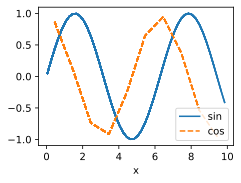

In [25]:
board = ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

loss.backward()
- torch traverses the computational graph backward and calcuate gradient w.r.t. w and b
- stores as `w.grad`, `b.grad`

In [26]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Forward
X = torch.tensor(3.0)
y_hat = w * X + b  # Computation graph sinh ra ở đây
loss = (y_hat - 10) ** 2 / 2

# Backward
loss.backward()

print(w.grad)  # gradient của loss theo w
print(b.grad)  # gradient của loss theo b

tensor(-9.)
tensor(-3.)


In [27]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

print('features:', data.X[0],'\nlabel:', data.y[0])

print(data.X.shape)
print(data.w.shape)

features: tensor([-0.9744, -0.3606]) 
label: tensor([3.4844])
torch.Size([2000, 2])
torch.Size([2])


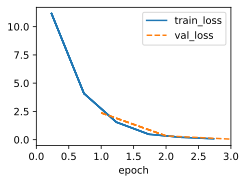

In [28]:
model = LinearRegressionScratch(2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = Trainer(max_epochs=3)
trainer.fit(model, data)

In [29]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0793, -0.1760])
error in estimating b: tensor([0.2234])


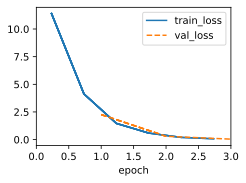

In [30]:
model = LinearRegression(lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = Trainer(max_epochs=3)
trainer.fit(model, data)

In [31]:
@add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0764, -0.1488])
error in estimating b: tensor([0.2292])


Generate synthetic data
$$
y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon, \quad \text{where } \epsilon \sim \mathcal{N}(0, 0.01^2)
$$

$d = 200$

In [32]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

L2 norm of w: 0.011492077261209488


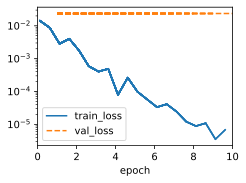

In [33]:
train_scratch(0)

L2 norm of w: 0.001663385657593608


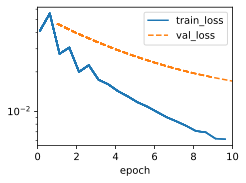

In [34]:
train_scratch(3)

L2 norm of w: 0.014667114242911339


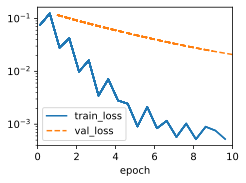

In [35]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

FashionMNIST